In [1]:
import ROOT as R
from analysis_branch import *
from util import *
import ctypes

ERROR in cling::CIFactory::createCI(): cannot extract standard library include paths!
Invoking:
  LC_ALL=C x86_64-conda-linux-gnu-c++   -DNDEBUG -xc++ -E -v /dev/null 2>&1 | sed -n -e '/^.include/,${' -e '/^ \/.*++/p' -e '}'
Results was:
With exit code 0


Welcome to JupyROOT 6.24/02


In [2]:
R.EnableImplicitMT()

In [20]:
# TESTING BLOCK 1

test_bkg_hist = R.TH1F('test_bkg','test_bkg',2,0,2)
test_sig_hist = R.TH1F('test_sig','test_sig',2,0,2)
test_data_hist = R.TH1F('test_data','test_data',2,0,2)

test_bkg_hist.SetBinContent(1,8000)
test_bkg_hist.SetBinContent(2,5000)
test_bkg_hist.SetFillColor(600)

test_sig_hist.SetBinContent(1,2000)
test_sig_hist.SetBinContent(2,1000)
test_sig_hist.SetFillColor(400)

test_data_hist.SetBinContent(1,11000)
test_data_hist.SetBinContent(2,6000)
test_data_hist.SetMarkerSize()
test_data_hist.SetMarkerStyle(20)
test_data_hist.Sumw2()

hs = R.THStack("stack","test")
hs.Add(test_bkg_hist)
hs.Add(test_sig_hist)


Warning in <TROOT::Append>: Replacing existing TH1: test_bkg (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: test_sig (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: test_data (Potential memory leak).


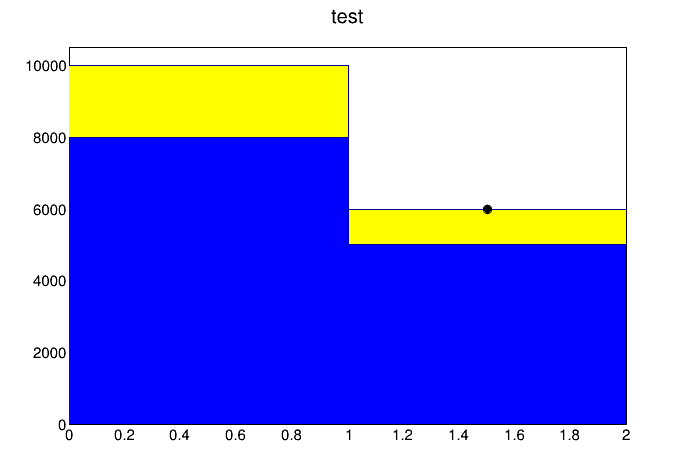

In [21]:
# TESTING BLOCK 2

c = R.TCanvas()
R.gStyle.SetOptStat(0000)
hs.Draw('histo')
test_data_hist.Draw('SAME')
hs.Draw('SAME')
test_data_hist.Draw('SAME')
c.Draw()

fit status: 
****************************************
Minimizer is Minuit / Migrad
MinFCN                    =      -258152
NDf                       =            0
Edm                       =  1.04671e-06
NCalls                    =           72
frac0                     =     0.617656   +/-   0.0754357   
frac1                     =     0.382359   +/-   0.0751483   

 **********
 **   25 **SET PRINT           0
 **********
 **********
 **   26 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 frac0        5.00000e-01  1.00000e-02     no limits
     2 frac1        5.00000e-01  1.00000e-02     no limits
 **********
 **   27 **SET ERR         0.5
 **********
 **********
 **   28 **SET PRINT           0
 **********
 **********
 **   29 **SET STR           1
 **********
 **********
 **   30 **MIGRAD        1220        0.01
 **********
 MACHINE ACCURACY LIMITS FURTHER IMPROVEMENT.
 MIGRAD MINIMIZATION HAS CONVERGED.
 MIGRAD WILL

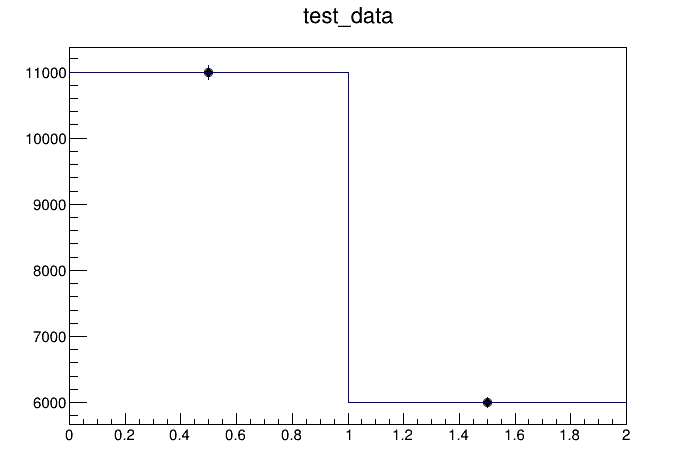

In [22]:
# TESTING BLOCK 3

mc = R.TObjArray(2)
mc.Add(test_sig_hist)
mc.Add(test_bkg_hist)
data = test_data_hist
fit = R.TFractionFitter(data, mc)
# fit.Constrain(0,0.9,1.1)
# fit.Constrain(1,0.9,1.1)
fit.SetRangeX(1,2)
status = fit.Fit()
print("fit status: "+str(status))
if status == 0:
    result = fit.GetPlot()
    c = R.TCanvas()
    R.gStyle.SetOptStat(0000)
    data.Draw("Ep")
    result.Draw("same")
    c.Draw()

SF_0 = ctypes.c_double(0.)
ERR_0 = ctypes.c_double(0.)

SF_1 = ctypes.c_double(0.)
ERR_1 = ctypes.c_double(0.)

fit.GetResult(0, SF_0, ERR_0)
fit.GetResult(1, SF_1, ERR_1)

3.5001015137435374
0.5000084724209627


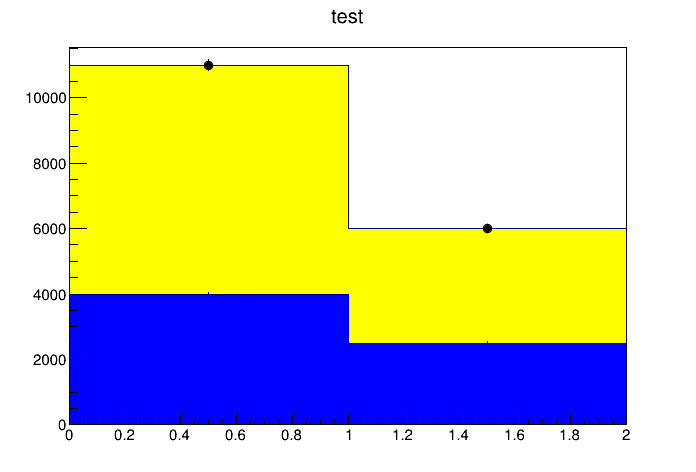

In [23]:
# TESTING BLOCK 4
# del test_bkg_hist
# del test_sig_hist
# del hs
# del c

test_sig_hist_new = fit.GetMCPrediction(0)
test_bkg_hist_new = fit.GetMCPrediction(1)
print(SF_0.value * test_data_hist.Integral()/test_sig_hist_new.Integral())
print(SF_1.value * test_data_hist.Integral()/test_bkg_hist_new.Integral())
test_sig_hist_new.Scale(SF_0.value * test_data_hist.Integral()/test_sig_hist_new.Integral())
test_bkg_hist_new.Scale(SF_1.value * test_data_hist.Integral()/test_bkg_hist_new.Integral())

test_bkg_hist_new.SetFillColor(600)
test_sig_hist_new.SetFillColor(400)

hs = R.THStack("stack","test")
hs.Add(test_bkg_hist_new)
hs.Add(test_sig_hist_new)

c = R.TCanvas()
R.gStyle.SetOptStat(0000)
hs.Draw('hist')
test_data_hist.Draw('SAME')
hs.Draw('SAME')
test_data_hist.Draw('SAME')
c.Draw()

In [3]:
norm_path = '/data/pubfs/zhanglic/workspace/VHH4bAnalysisNtuples/2022_Ntuple_v3/2018/'


In [4]:
sample_list = ['Data','TT','TTBB','DY','Other']

In [5]:
for _sample in sample_list:
    rdf_dict[_sample+'_SB_2b'] = R.RDataFrame('Events',norm_path+'/'+_sample+'_Zll_rHH_SB_two_btag.root')
    rdf_dict[_sample+'_SB_3b'] = R.RDataFrame('Events',norm_path+'/'+_sample+'_Zll_rHH_SB_three_btag.root')
    rdf_dict[_sample+'_SB_4b'] = R.RDataFrame('Events',norm_path+'/'+_sample+'_Zll_rHH_SB_four_btag.root')
    rdf_dict[_sample+'_CR_2b'] = R.RDataFrame('Events',norm_path+'/'+_sample+'_Zll_rHH_CR_two_btag.root')
    rdf_dict[_sample+'_CR_3b'] = R.RDataFrame('Events',norm_path+'/'+_sample+'_Zll_rHH_CR_three_btag.root')
    rdf_dict[_sample+'_CR_4b'] = R.RDataFrame('Events',norm_path+'/'+_sample+'_Zll_rHH_CR_four_btag.root')
    rdf_dict[_sample+'_SR_2b'] = R.RDataFrame('Events',norm_path+'/'+_sample+'_Zll_rHH_SR_two_btag.root')
    rdf_dict[_sample+'_SR_3b'] = R.RDataFrame('Events',norm_path+'/'+_sample+'_Zll_rHH_SR_three_btag.root')
    rdf_dict[_sample+'_SR_4b'] = R.RDataFrame('Events',norm_path+'/'+_sample+'_Zll_rHH_SR_four_btag.root')
#END

In [6]:
model = R.RDF.TH1DModel('No3_btag_score', 'No3_btag_score', 10, 0.2, 1.0)

In [7]:
f_hist_out_Z = R.TFile('Histo_for_No3_btag_score_Z.root' ,'RECREATE')

In [8]:
for _sample in sample_list:
    model = R.RDF.TH1DModel(_sample+'_SB_2b_Z_var'+'No3_btag_score','No3_btag_score', 20, 0, 1)
    histo_dict[_sample+'_SB_2b_Z_var'] = rdf_dict[_sample+'_SB_2b'].Filter('isZee||isZmm')\
    .Filter('V_mass>75 && V_mass<105')\
    .Histo1D(model,'No3_btag_score','weight')
    
    model = R.RDF.TH1DModel(_sample+'_SB_3b_Z_var'+'No3_btag_score','No3_btag_score', 20, 0, 1)
    histo_dict[_sample+'_SB_3b_Z_var'] = rdf_dict[_sample+'_SB_3b'].Filter('isZee||isZmm')\
    .Filter('V_mass>75 && V_mass<105')\
    .Histo1D(model,'No3_btag_score','weight')
    
    model = R.RDF.TH1DModel(_sample+'_SB_4b_Z_var'+'No3_btag_score','No3_btag_score', 20, 0, 1)
    histo_dict[_sample+'_SB_4b_Z_var'] = rdf_dict[_sample+'_SB_4b'].Filter('isZee||isZmm')\
    .Filter('V_mass>75 && V_mass<105')\
    .Histo1D(model,'No3_btag_score','weight')
    
    histo_dict[_sample+'_SB_2b_Z_var'].Write()
    histo_dict[_sample+'_SB_3b_Z_var'].Write()
    histo_dict[_sample+'_SB_4b_Z_var'].Write()
    
    
    model = R.RDF.TH1DModel(_sample+'_CR_2b_Z_var'+'No3_btag_score','No3_btag_score', 20, 0, 1)
    histo_dict[_sample+'_CR_2b_Z_var'] = rdf_dict[_sample+'_CR_2b'].Filter('isZee||isZmm')\
    .Filter('V_mass>75 && V_mass<105')\
    .Histo1D(model,'No3_btag_score','weight')
    
    model = R.RDF.TH1DModel(_sample+'_CR_3b_Z_var'+'No3_btag_score','No3_btag_score', 20, 0, 1)
    histo_dict[_sample+'_CR_3b_Z_var'] = rdf_dict[_sample+'_CR_3b'].Filter('isZee||isZmm')\
    .Filter('V_mass>75 && V_mass<105')\
    .Histo1D(model,'No3_btag_score','weight')
    
    model = R.RDF.TH1DModel(_sample+'_CR_4b_Z_var'+'No3_btag_score','No3_btag_score', 20, 0, 1)
    histo_dict[_sample+'_CR_4b_Z_var'] = rdf_dict[_sample+'_CR_4b'].Filter('isZee||isZmm')\
    .Filter('V_mass>75 && V_mass<105')\
    .Histo1D(model,'No3_btag_score','weight')
    
    histo_dict[_sample+'_CR_2b_Z_var'].Write()
    histo_dict[_sample+'_CR_3b_Z_var'].Write()
    histo_dict[_sample+'_CR_4b_Z_var'].Write()
    
    model = R.RDF.TH1DModel(_sample+'_SR_2b_Z_var'+'No3_btag_score','No3_btag_score', 20, 0, 1)
    histo_dict[_sample+'_SR_2b_Z_var'] = rdf_dict[_sample+'_SR_2b'].Filter('isZee||isZmm')\
    .Filter('V_mass>75 && V_mass<105')\
    .Histo1D(model,'No3_btag_score','weight')
    
    model = R.RDF.TH1DModel(_sample+'_SR_3b_Z_var'+'No3_btag_score','No3_btag_score', 20, 0, 1)
    histo_dict[_sample+'_SR_3b_Z_var'] = rdf_dict[_sample+'_SR_3b'].Filter('isZee||isZmm')\
    .Filter('V_mass>75 && V_mass<105')\
    .Histo1D(model,'No3_btag_score','weight')
    
    model = R.RDF.TH1DModel(_sample+'_SR_4b_Z_var'+'No3_btag_score','No3_btag_score', 20, 0, 1)
    histo_dict[_sample+'_SR_4b_Z_var'] = rdf_dict[_sample+'_SR_4b'].Filter('isZee||isZmm')\
    .Filter('V_mass>75 && V_mass<105')\
    .Histo1D(model,'No3_btag_score','weight')
    
    histo_dict[_sample+'_SR_2b_Z_var'].Write()
    histo_dict[_sample+'_SR_3b_Z_var'].Write()
    histo_dict[_sample+'_SR_4b_Z_var'].Write()
#END

KeyboardInterrupt: 

In [ ]:
f_hist_out_Z.Close()

In [ ]:
f_hist_in_Z = R.TFile('Histo_for_No3_btag_score_Z.root','READ')

In [17]:
histo_dict  = {}
keys = f_hist_in_Z.GetListOfKeys()
for key in keys:
    histo_dict[key.ReadObj().GetName()] = f_hist_in_Z.Get(key.ReadObj().GetName())
#     print(key.ReadObj().GetName())

In [18]:
hs = R.THStack("stack","No3_btag_score")

hs.Add(histo_dict['Other_SB_2b_Z_varNo3_btag_score'])
histo_dict['Other_SB_2b_Z_varNo3_btag_score'].SetFillColor(800)

hs.Add(histo_dict['ttbb_SB_2b_Z_varNo3_btag_score'])
histo_dict['ttbb_SB_2b_Z_varNo3_btag_score'].SetFillColor(432)

hs.Add(histo_dict['TT_SB_2b_Z_varNo3_btag_score'])
histo_dict['TT_SB_2b_Z_varNo3_btag_score'].SetFillColor(600)

hs.Add(histo_dict['DY_SB_2b_Z_varNo3_btag_score'])
histo_dict['DY_SB_2b_Z_varNo3_btag_score'].SetFillColor(400)

histo_dict['Data_SB_2b_Z_varNo3_btag_score'].SetMarkerSize()
histo_dict['Data_SB_2b_Z_varNo3_btag_score'].SetMarkerStyle(20)
histo_dict['Data_SB_2b_Z_varNo3_btag_score'].Sumw2()


KeyError: 'ttbb_SB_2b_Z_varNo3_btag_score'

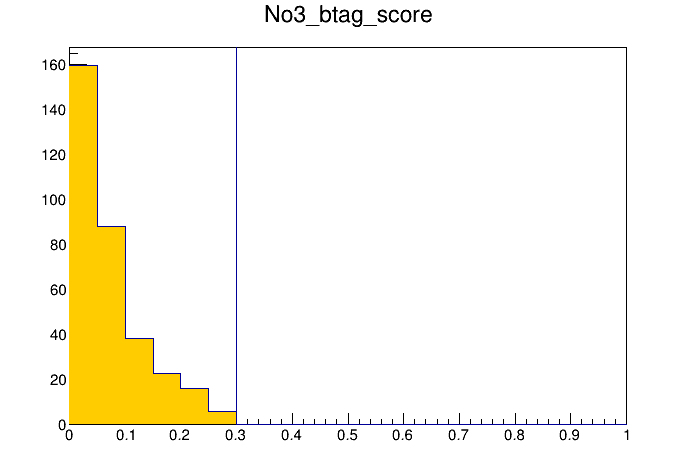

In [19]:
c = R.TCanvas()
R.gStyle.SetOptStat(0000)
hs.Draw('hist')
histo_dict['Data_SB_2b_Z_varNo3_btag_score'].Draw('SAME')
hs.Draw('histSAME')
histo_dict['Data_SB_2b_Z_varNo3_btag_score'].Draw('SAME')
c.Draw()

In [14]:
hs = R.THStack("stack","No3_btag_score")

hs.Add(histo_dict['Other_CR_2b_Z_varNo3_btag_score'])
histo_dict['Other_CR_2b_Z_varNo3_btag_score'].SetFillColor(800)

hs.Add(histo_dict['ttbb_CR_2b_Z_varNo3_btag_score'])
histo_dict['ttbb_CR_2b_Z_varNo3_btag_score'].SetFillColor(432)

hs.Add(histo_dict['TT_CR_2b_Z_varNo3_btag_score'])
histo_dict['TT_CR_2b_Z_varNo3_btag_score'].SetFillColor(600)

hs.Add(histo_dict['DY_CR_2b_Z_varNo3_btag_score'])
histo_dict['DY_CR_2b_Z_varNo3_btag_score'].SetFillColor(400)

histo_dict['Data_CR_2b_Z_varNo3_btag_score'].SetMarkerSize()
histo_dict['Data_CR_2b_Z_varNo3_btag_score'].SetMarkerStyle(20)
histo_dict['Data_CR_2b_Z_varNo3_btag_score'].Sumw2()

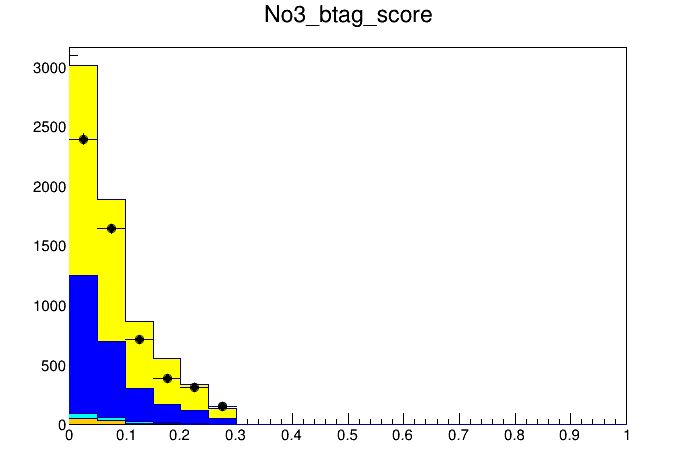

In [15]:
c = R.TCanvas()
R.gStyle.SetOptStat(0000)
hs.Draw('hist')
histo_dict['Data_CR_2b_Z_varNo3_btag_score'].Draw('SAME')
hs.Draw('histSAME')
histo_dict['Data_CR_2b_Z_varNo3_btag_score'].Draw('SAME')
c.Draw()

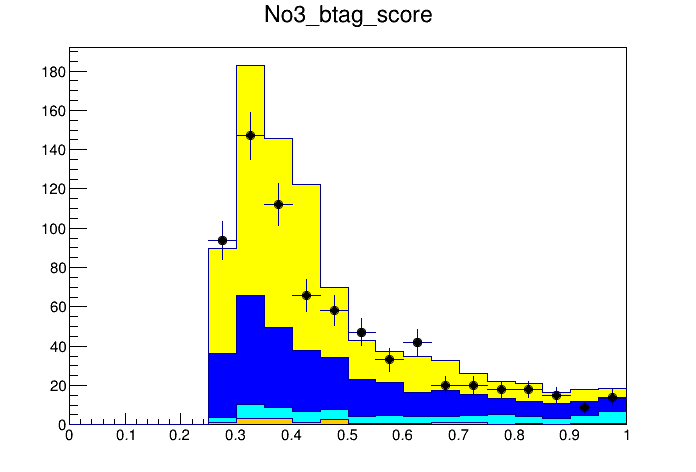

In [32]:
hs = R.THStack("stack","No3_btag_score")

hs.Add(histo_dict['Other_CR_3b_Z_varNo3_btag_score'])
histo_dict['Other_CR_3b_Z_varNo3_btag_score'].SetFillColor(800)

hs.Add(histo_dict['ttbb_CR_3b_Z_varNo3_btag_score'])
histo_dict['ttbb_CR_3b_Z_varNo3_btag_score'].SetFillColor(432)

hs.Add(histo_dict['TT_CR_3b_Z_varNo3_btag_score'])
histo_dict['TT_CR_3b_Z_varNo3_btag_score'].SetFillColor(600)

hs.Add(histo_dict['DY_CR_3b_Z_varNo3_btag_score'])
histo_dict['DY_CR_3b_Z_varNo3_btag_score'].SetFillColor(400)

histo_dict['Data_CR_3b_Z_varNo3_btag_score'].SetMarkerSize()
histo_dict['Data_CR_3b_Z_varNo3_btag_score'].SetMarkerStyle(20)
histo_dict['Data_CR_3b_Z_varNo3_btag_score'].Sumw2()



c = R.TCanvas()
R.gStyle.SetOptStat(0000)
hs.Draw('hist')
histo_dict['Data_CR_3b_Z_varNo3_btag_score'].Draw('SAME')
hs.Draw('histSAME')
histo_dict['Data_CR_3b_Z_varNo3_btag_score'].Draw('SAME')
c.Draw()

In [7]:
f_hist_out_TT = R.TFile('Histo_for_No3_btag_score_TT.root' ,'RECREATE')

In [8]:
for _sample in sample_list:
    model = R.RDF.TH1DModel(_sample+'_SB_2b_Z_var'+'No3_btag_score','No3_btag_score', 15, 0, 1)
    histo_dict[_sample+'_SB_2b_Z_var'] = rdf_dict[_sample+'_SB_2b'].Filter('isZee||isZmm')\
    .Filter('V_mass<75 || V_mass>105')\
    .Histo1D(model,'No3_btag_score','weight')
    
    model = R.RDF.TH1DModel(_sample+'_SB_3b_Z_var'+'No3_btag_score','No3_btag_score', 15, 0, 1)
    histo_dict[_sample+'_SB_3b_Z_var'] = rdf_dict[_sample+'_SB_3b'].Filter('isZee||isZmm')\
    .Filter('V_mass<75 || V_mass>105')\
    .Histo1D(model,'No3_btag_score','weight')
    
    model = R.RDF.TH1DModel(_sample+'_SB_4b_Z_var'+'No3_btag_score','No3_btag_score', 15, 0, 1)
    histo_dict[_sample+'_SB_4b_Z_var'] = rdf_dict[_sample+'_SB_4b'].Filter('isZee||isZmm')\
    .Filter('V_mass<75 || V_mass>105')\
    .Histo1D(model,'No3_btag_score','weight')
    
    histo_dict[_sample+'_SB_2b_Z_var'].Write()
    histo_dict[_sample+'_SB_3b_Z_var'].Write()
    histo_dict[_sample+'_SB_4b_Z_var'].Write()
    
    
    model = R.RDF.TH1DModel(_sample+'_CR_2b_Z_var'+'No3_btag_score','No3_btag_score', 15, 0, 1)
    histo_dict[_sample+'_CR_2b_Z_var'] = rdf_dict[_sample+'_CR_2b'].Filter('isZee||isZmm')\
    .Filter('V_mass<75 || V_mass>105')\
    .Histo1D(model,'No3_btag_score','weight')
    
    model = R.RDF.TH1DModel(_sample+'_CR_3b_Z_var'+'No3_btag_score','No3_btag_score', 15, 0, 1)
    histo_dict[_sample+'_CR_3b_Z_var'] = rdf_dict[_sample+'_CR_3b'].Filter('isZee||isZmm')\
    .Filter('V_mass<75 || V_mass>105')\
    .Histo1D(model,'No3_btag_score','weight')
    
    model = R.RDF.TH1DModel(_sample+'_CR_4b_Z_var'+'No3_btag_score','No3_btag_score', 15, 0, 1)
    histo_dict[_sample+'_CR_4b_Z_var'] = rdf_dict[_sample+'_CR_4b'].Filter('isZee||isZmm')\
    .Filter('V_mass<75 || V_mass>105')\
    .Histo1D(model,'No3_btag_score','weight')
    
    histo_dict[_sample+'_CR_2b_Z_var'].Write()
    histo_dict[_sample+'_CR_3b_Z_var'].Write()
    histo_dict[_sample+'_CR_4b_Z_var'].Write()
    
    model = R.RDF.TH1DModel(_sample+'_SR_2b_Z_var'+'No3_btag_score','No3_btag_score', 15, 0, 1)
    histo_dict[_sample+'_SR_2b_Z_var'] = rdf_dict[_sample+'_SR_2b'].Filter('isZee||isZmm')\
    .Filter('V_mass<75 || V_mass>105')\
    .Histo1D(model,'No3_btag_score','weight')
    
    model = R.RDF.TH1DModel(_sample+'_SR_3b_Z_var'+'No3_btag_score','No3_btag_score', 15, 0, 1)
    histo_dict[_sample+'_SR_3b_Z_var'] = rdf_dict[_sample+'_SR_3b'].Filter('isZee||isZmm')\
    .Filter('V_mass<75 || V_mass>105')\
    .Histo1D(model,'No3_btag_score','weight')
    
    model = R.RDF.TH1DModel(_sample+'_SR_4b_Z_var'+'No3_btag_score','No3_btag_score', 15, 0, 1)
    histo_dict[_sample+'_SR_4b_Z_var'] = rdf_dict[_sample+'_SR_4b'].Filter('isZee||isZmm')\
    .Filter('V_mass<75 || V_mass>105')\
    .Histo1D(model,'No3_btag_score','weight')
    
    histo_dict[_sample+'_SR_2b_Z_var'].Write()
    histo_dict[_sample+'_SR_3b_Z_var'].Write()
    histo_dict[_sample+'_SR_4b_Z_var'].Write()
#END

In [9]:
f_hist_out_TT.Close()

In [10]:
f_hist_in_TT = R.TFile('Histo_for_No3_btag_score_TT.root','READ')

In [11]:
histo_dict  = {}
keys = f_hist_in_TT.GetListOfKeys()
for key in keys:
    histo_dict[key.ReadObj().GetName()] = f_hist_in_TT.Get(key.ReadObj().GetName())
#     print(key.ReadObj().GetName())

In [52]:
hs = R.THStack("stack","No3_btag_score")

hs.Add(histo_dict['Other_SB_2b_Z_varNo3_btag_score'])
histo_dict['Other_SB_2b_Z_varNo3_btag_score'].SetFillColor(800)

hs.Add(histo_dict['ttbb_SB_2b_Z_varNo3_btag_score'])
histo_dict['ttbb_SB_2b_Z_varNo3_btag_score'].SetFillColor(432)

hs.Add(histo_dict['TT_SB_2b_Z_varNo3_btag_score'])
histo_dict['TT_SB_2b_Z_varNo3_btag_score'].SetFillColor(600)

hs.Add(histo_dict['DY_SB_2b_Z_varNo3_btag_score'])
histo_dict['DY_SB_2b_Z_varNo3_btag_score'].SetFillColor(400)

histo_dict['Data_SB_2b_Z_varNo3_btag_score'].SetMarkerSize(1)
histo_dict['Data_SB_2b_Z_varNo3_btag_score'].SetMarkerStyle(20)
histo_dict['Data_SB_2b_Z_varNo3_btag_score'].Sumw2()

c = R.TCanvas()
R.gStyle.SetOptStat(0000)
hs.Draw('hist')
histo_dict['Data_SB_2b_Z_varNo3_btag_score'].Draw('SAME')
hs.Draw('histSAME')
histo_dict['Data_SB_2b_Z_varNo3_btag_score'].Draw('SAME')
c.Draw()

KeyError: 'ttbb_SB_2b_Z_varNo3_btag_score'

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


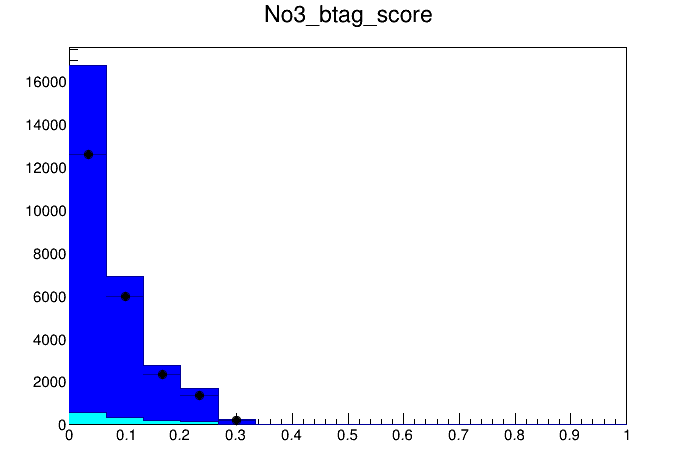

In [12]:
hs = R.THStack("stack","No3_btag_score")

# hs.Add(histo_dict['Other_SB_2b_Z_varNo3_btag_score'])
# histo_dict['Other_SB_2b_Z_varNo3_btag_score'].SetFillColor(800)

hs.Add(histo_dict['ttbb_SB_2b_Z_varNo3_btag_score'])
histo_dict['ttbb_SB_2b_Z_varNo3_btag_score'].SetFillColor(432)

hs.Add(histo_dict['TT_SB_2b_Z_varNo3_btag_score'])
histo_dict['TT_SB_2b_Z_varNo3_btag_score'].SetFillColor(600)

# hs.Add(histo_dict['DY_SB_2b_Z_varNo3_btag_score'])
# histo_dict['DY_SB_2b_Z_varNo3_btag_score'].SetFillColor(400)


histo_dict['Data_SB_2b_Z_varNo3_btag_score'] \
= histo_dict['Data_SB_2b_Z_varNo3_btag_score'] \
- histo_dict['DY_SB_2b_Z_varNo3_btag_score'] - histo_dict['Other_SB_2b_Z_varNo3_btag_score']
histo_dict['Data_SB_2b_Z_varNo3_btag_score'].SetMarkerSize(1)
histo_dict['Data_SB_2b_Z_varNo3_btag_score'].SetMarkerStyle(20)
histo_dict['Data_SB_2b_Z_varNo3_btag_score'].Sumw2()

c = R.TCanvas()
R.gStyle.SetOptStat(0000)
hs.Draw('hist')
histo_dict['Data_SB_2b_Z_varNo3_btag_score'].Draw('SAME')
hs.Draw('histSAME')
histo_dict['Data_SB_2b_Z_varNo3_btag_score'].Draw('SAME')
c.Draw()

fit status: 
****************************************
Minimizer is Minuit / Migrad
MinFCN                    =      -404862
NDf                       =            0
Edm                       =  7.91253e-06
NCalls                    =          100
frac0                     =      0.21801   +/-   0.0295604   
frac1                     =     0.782019   +/-   0.0296235    	 (limited)

 **********
 **    1 **SET PRINT           0
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 frac0        5.00000e-01  1.00000e-02     no limits
     2 frac1        5.00000e-01  1.00000e-02    0.00000e+00  1.00000e+00
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           0
 **********
 **********
 **    5 **SET STR           1
 **********
 **********
 **    6 **MIGRAD        1220        0.01
 **********
 MACHINE ACCURACY LIMITS FURTHER IMPROVEMENT.
 MIGRAD MINIMIZATION H

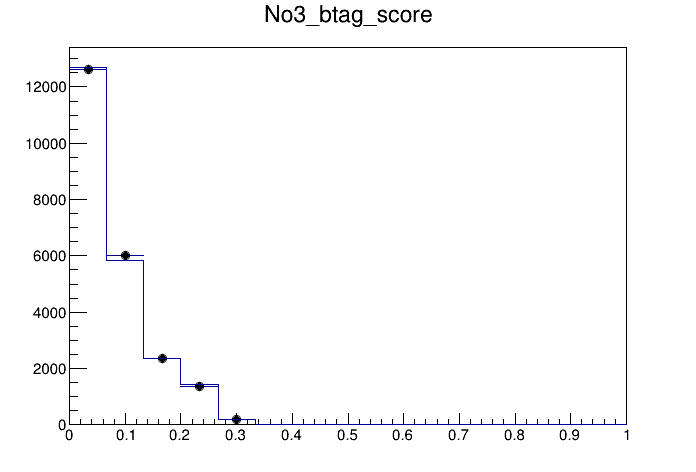

In [13]:
mc = R.TObjArray(2)
mc.Add(histo_dict['ttbb_SB_2b_Z_varNo3_btag_score'])
mc.Add(histo_dict['TT_SB_2b_Z_varNo3_btag_score'])
data = histo_dict['Data_SB_2b_Z_varNo3_btag_score']
fit = R.TFractionFitter(data, mc)
fit.Constrain(1,0.0,1.0)
fit.SetRangeX(1,15)
status = fit.Fit()
print("fit status: "+str(status))
if status == 0:
    result = fit.GetPlot()
    c = R.TCanvas()
    R.gStyle.SetOptStat(0000)
    data.Draw("Ep")
    result.Draw("same")
    c.Draw()

In [14]:
histo_dict  = {}
keys = f_hist_in_TT.GetListOfKeys()
for key in keys:
    histo_dict[key.ReadObj().GetName()] = f_hist_in_TT.Get(key.ReadObj().GetName())
#     print(key.ReadObj().GetName())

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


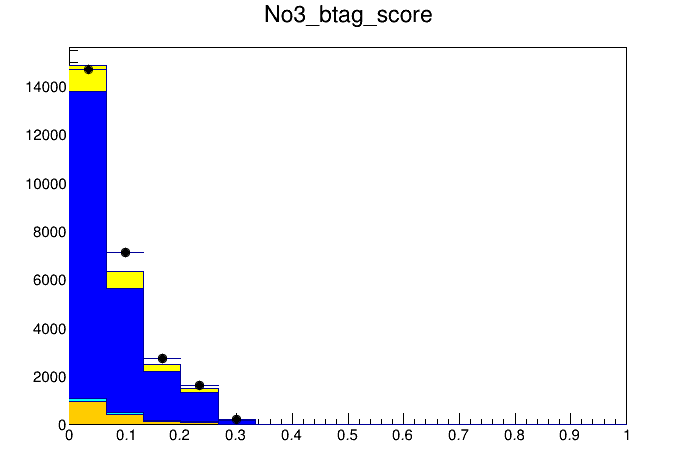

In [15]:
hs = R.THStack("stack","No3_btag_score")

hs.Add(histo_dict['Other_SB_2b_Z_varNo3_btag_score'])
histo_dict['Other_SB_2b_Z_varNo3_btag_score'].SetFillColor(800)

hs.Add(histo_dict['ttbb_SB_2b_Z_varNo3_btag_score']*2.18009e-01)
histo_dict['ttbb_SB_2b_Z_varNo3_btag_score'].SetFillColor(432)

hs.Add(histo_dict['TT_SB_2b_Z_varNo3_btag_score']*7.82019e-01)
histo_dict['TT_SB_2b_Z_varNo3_btag_score'].SetFillColor(600)

hs.Add(histo_dict['DY_SB_2b_Z_varNo3_btag_score'])
histo_dict['DY_SB_2b_Z_varNo3_btag_score'].SetFillColor(400)

histo_dict['Data_SB_2b_Z_varNo3_btag_score'].SetMarkerSize(1)
histo_dict['Data_SB_2b_Z_varNo3_btag_score'].SetMarkerStyle(20)
histo_dict['Data_SB_2b_Z_varNo3_btag_score'].Sumw2()

c = R.TCanvas()
R.gStyle.SetOptStat(0000)
hs.Draw('hist')
histo_dict['Data_SB_2b_Z_varNo3_btag_score'].Draw('SAME')
hs.Draw('histSAME')
histo_dict['Data_SB_2b_Z_varNo3_btag_score'].Draw('SAME')
c.Draw()

In [53]:
histo_dict  = {}
keys = f_hist_in_TT.GetListOfKeys()
for key in keys:
    histo_dict[key.ReadObj().GetName()] = f_hist_in_TT.Get(key.ReadObj().GetName())
#     print(key.ReadObj().GetName())

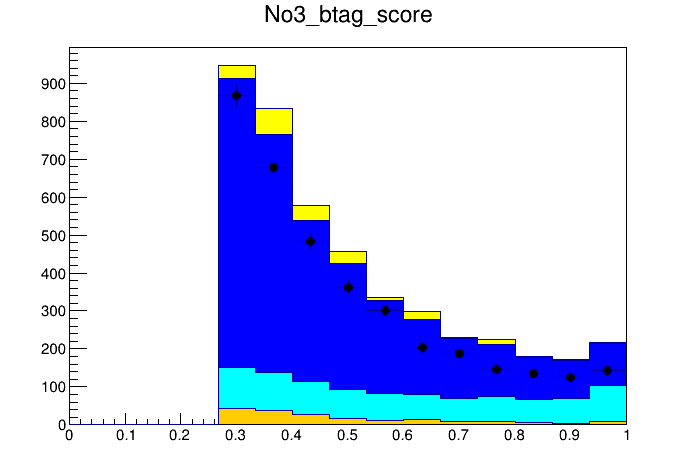

In [12]:
hs = R.THStack("stack","No3_btag_score")

hs.Add(histo_dict['Other_SB_3b_Z_varNo3_btag_score'])
histo_dict['Other_SB_3b_Z_varNo3_btag_score'].SetFillColor(800)

hs.Add(histo_dict['TTBB_SB_3b_Z_varNo3_btag_score'])
histo_dict['TTBB_SB_3b_Z_varNo3_btag_score'].SetFillColor(432)

hs.Add(histo_dict['TT_SB_3b_Z_varNo3_btag_score'])
histo_dict['TT_SB_3b_Z_varNo3_btag_score'].SetFillColor(600)

hs.Add(histo_dict['DY_SB_3b_Z_varNo3_btag_score'])
histo_dict['DY_SB_3b_Z_varNo3_btag_score'].SetFillColor(400)

histo_dict['Data_SB_3b_Z_varNo3_btag_score'].SetMarkerSize(1)
histo_dict['Data_SB_3b_Z_varNo3_btag_score'].SetMarkerStyle(20)
histo_dict['Data_SB_3b_Z_varNo3_btag_score'].Sumw2()

c = R.TCanvas()
R.gStyle.SetOptStat(0000)
hs.Draw('hist')
histo_dict['Data_SB_3b_Z_varNo3_btag_score'].Draw('SAME')
hs.Draw('histSAME')
histo_dict['Data_SB_3b_Z_varNo3_btag_score'].Draw('SAME')
c.Draw()

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


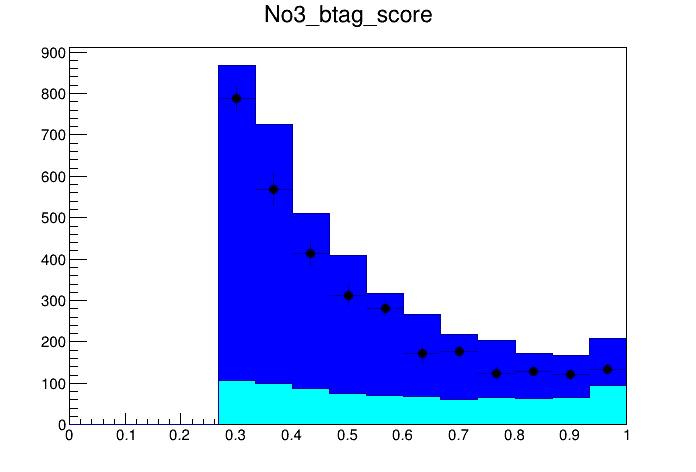

In [39]:
hs = R.THStack("stack","No3_btag_score")

# hs.Add(histo_dict['Other_SB_3b_Z_varNo3_btag_score'])
# histo_dict['Other_SB_3b_Z_varNo3_btag_score'].SetFillColor(800)

hs.Add(histo_dict['TTBB_SB_3b_Z_varNo3_btag_score'])
histo_dict['TTBB_SB_3b_Z_varNo3_btag_score'].SetFillColor(432)

hs.Add(histo_dict['TT_SB_3b_Z_varNo3_btag_score'])
histo_dict['TT_SB_3b_Z_varNo3_btag_score'].SetFillColor(600)

# hs.Add(histo_dict['DY_SB_3b_Z_varNo3_btag_score'])
# histo_dict['DY_SB_3b_Z_varNo3_btag_score'].SetFillColor(400)

histo_dict['Data_SB_3b_Z_varNo3_btag_score'] \
= histo_dict['Data_SB_3b_Z_varNo3_btag_score'] \
- histo_dict['DY_SB_3b_Z_varNo3_btag_score'] - histo_dict['Other_SB_3b_Z_varNo3_btag_score']



histo_dict['Data_SB_3b_Z_varNo3_btag_score'].SetMarkerSize(1)
histo_dict['Data_SB_3b_Z_varNo3_btag_score'].SetMarkerStyle(20)
histo_dict['Data_SB_3b_Z_varNo3_btag_score'].Sumw2()

c = R.TCanvas()
R.gStyle.SetOptStat(0000)
hs.Draw('hist')
histo_dict['Data_SB_3b_Z_varNo3_btag_score'].Draw('SAME')
hs.Draw('histSAME')
histo_dict['Data_SB_3b_Z_varNo3_btag_score'].Draw('SAME')
c.Draw()

fit status: 
****************************************
Minimizer is Minuit / Migrad
MinFCN                    =     -34427.4
NDf                       =            0
Edm                       =  2.94531e-08
NCalls                    =           59
frac0                     =    0.0688917   +/-   0.0393896   
frac1                     =     0.931104   +/-   0.0454618   

 **********
 **    7 **SET PRINT           0
 **********
 **********
 **    8 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 frac0        5.00000e-01  1.00000e-02     no limits
     2 frac1        5.00000e-01  1.00000e-02     no limits
 **********
 **    9 **SET ERR         0.5
 **********
 **********
 **   10 **SET PRINT           0
 **********
 **********
 **   11 **SET STR           1
 **********
 **********
 **   12 **MIGRAD        1220        0.01
 **********
 MIGRAD MINIMIZATION HAS CONVERGED.
 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.
 FCN=-34

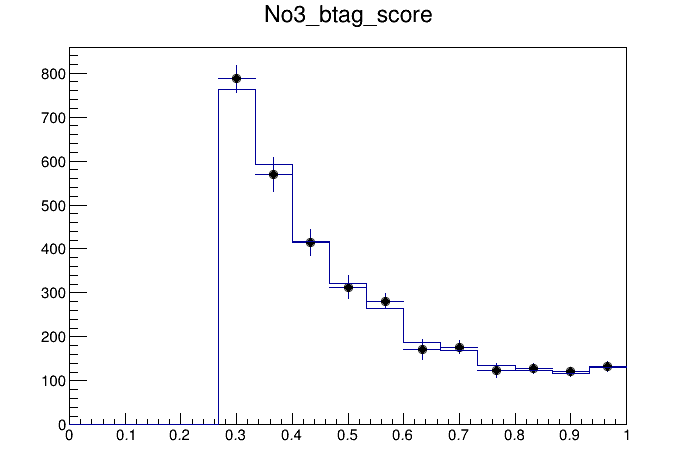

In [30]:
mc = R.TObjArray(2)
mc.Add(histo_dict['TTBB_SB_3b_Z_varNo3_btag_score'])
mc.Add(histo_dict['TT_SB_3b_Z_varNo3_btag_score'])
data = histo_dict['Data_SB_3b_Z_varNo3_btag_score']
fit = R.TFractionFitter(data, mc)
fitter = fit.GetFitter()
# fitter.Config().ParSettings(0).Set('TTBB', 1.0, 0.001, 0.70, 1.40)
# fitter.Config().ParSettings(1).Set('TT', 1.0, 0.001, 0.30, 1.80)

# fit.Constrain(0,0.8,1.2)
# fit.Constrain(1,0.1,2.0)
fit.SetRangeX(5,15)
status = fit.Fit()
print("fit status: "+str(status))
if status == 0:
    result = fit.GetPlot()
    c = R.TCanvas()
    R.gStyle.SetOptStat(0000)
    data.Draw("Ep")
    result.Draw("same")
    c.Draw()

SF_0 = ctypes.c_double(0.)
ERR_0 = ctypes.c_double(0.)

SF_1 = ctypes.c_double(0.)
ERR_1 = ctypes.c_double(0.)

fit.GetResult(0, SF_0, ERR_0)
fit.GetResult(1, SF_1, ERR_1)

In [19]:
histo_dict  = {}
keys = f_hist_in_TT.GetListOfKeys()
for key in keys:
    histo_dict[key.ReadObj().GetName()] = f_hist_in_TT.Get(key.ReadObj().GetName())
#     print(key.ReadObj().GetName())

In [20]:
test_sig_hist_new = fit.GetMCPrediction(0)
test_bkg_hist_new = fit.GetMCPrediction(1)
print(SF_0.value * data.Integral()/test_sig_hist_new.Integral())
print(SF_1.value * data.Integral()/test_bkg_hist_new.Integral())

0.2568246784197144
0.9360375905803365


Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


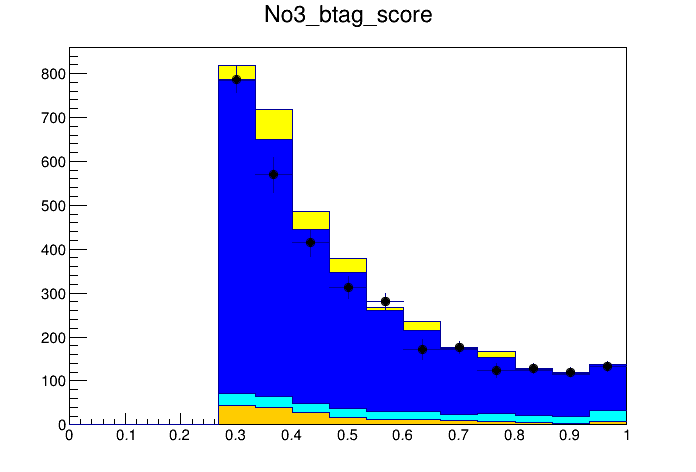

In [41]:
hs = R.THStack("stack","No3_btag_score")

hs.Add(histo_dict['Other_SB_3b_Z_varNo3_btag_score'])
histo_dict['Other_SB_3b_Z_varNo3_btag_score'].SetFillColor(800)

hs.Add(histo_dict['TTBB_SB_3b_Z_varNo3_btag_score']*0.2568246784197144)
histo_dict['TTBB_SB_3b_Z_varNo3_btag_score'].SetFillColor(432)

hs.Add(histo_dict['TT_SB_3b_Z_varNo3_btag_score']*0.9360375905803365)
histo_dict['TT_SB_3b_Z_varNo3_btag_score'].SetFillColor(600)

hs.Add(histo_dict['DY_SB_3b_Z_varNo3_btag_score'])
histo_dict['DY_SB_3b_Z_varNo3_btag_score'].SetFillColor(400)

histo_dict['Data_SB_3b_Z_varNo3_btag_score'].SetMarkerSize(1)
histo_dict['Data_SB_3b_Z_varNo3_btag_score'].SetMarkerStyle(20)
histo_dict['Data_SB_3b_Z_varNo3_btag_score'].Sumw2()

c = R.TCanvas()
R.gStyle.SetOptStat(0000)
hs.Draw('hist')
histo_dict['Data_SB_3b_Z_varNo3_btag_score'].Draw('SAME')
hs.Draw('histSAME')
histo_dict['Data_SB_3b_Z_varNo3_btag_score'].Draw('SAME')
c.Draw()

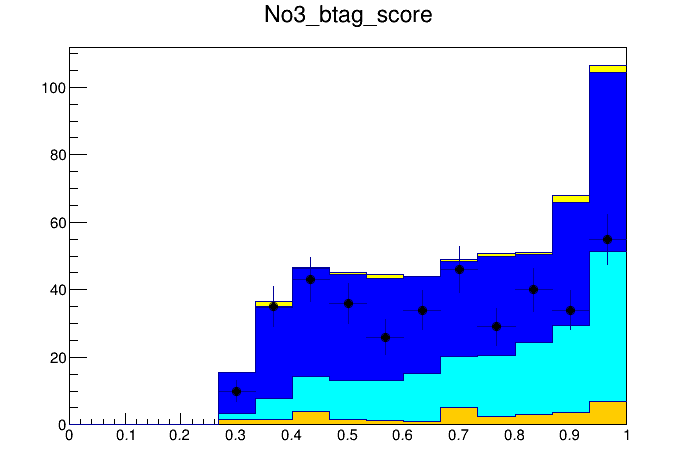

In [47]:
hs = R.THStack("stack","No3_btag_score")

hs.Add(histo_dict['Other_SB_4b_Z_varNo3_btag_score'])
histo_dict['Other_SB_4b_Z_varNo3_btag_score'].SetFillColor(800)

hs.Add(histo_dict['ttbb_SB_4b_Z_varNo3_btag_score'])
histo_dict['ttbb_SB_4b_Z_varNo3_btag_score'].SetFillColor(432)

hs.Add(histo_dict['TT_SB_4b_Z_varNo3_btag_score'])
histo_dict['TT_SB_4b_Z_varNo3_btag_score'].SetFillColor(600)

hs.Add(histo_dict['DY_SB_4b_Z_varNo3_btag_score'])
histo_dict['DY_SB_4b_Z_varNo3_btag_score'].SetFillColor(400)

histo_dict['Data_SB_4b_Z_varNo3_btag_score'].SetMarkerSize(1)
histo_dict['Data_SB_4b_Z_varNo3_btag_score'].SetMarkerStyle(20)
histo_dict['Data_SB_4b_Z_varNo3_btag_score'].Sumw2()

c = R.TCanvas()
R.gStyle.SetOptStat(0000)
hs.Draw('hist')
histo_dict['Data_SB_4b_Z_varNo3_btag_score'].Draw('SAME')
hs.Draw('histSAME')
histo_dict['Data_SB_4b_Z_varNo3_btag_score'].Draw('SAME')
c.Draw()

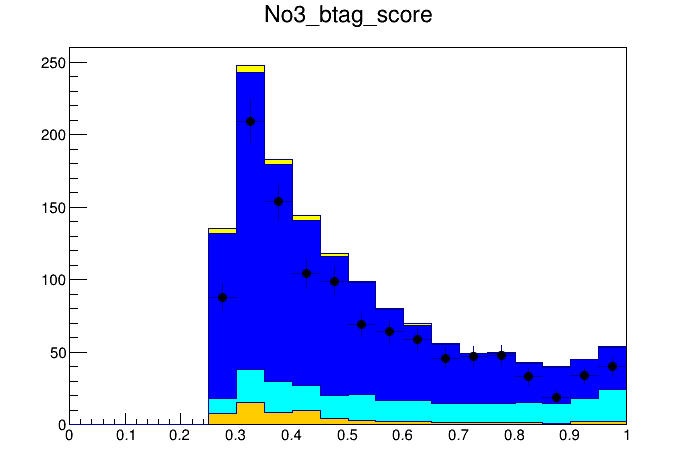

In [28]:
hs = R.THStack("stack","No3_btag_score")

hs.Add(histo_dict['Other_CR_3b_Z_varNo3_btag_score'])
histo_dict['Other_CR_3b_Z_varNo3_btag_score'].SetFillColor(800)

hs.Add(histo_dict['ttbb_CR_3b_Z_varNo3_btag_score'])
histo_dict['ttbb_CR_3b_Z_varNo3_btag_score'].SetFillColor(432)

hs.Add(histo_dict['TT_CR_3b_Z_varNo3_btag_score'])
histo_dict['TT_CR_3b_Z_varNo3_btag_score'].SetFillColor(600)

hs.Add(histo_dict['DY_CR_3b_Z_varNo3_btag_score'])
histo_dict['DY_CR_3b_Z_varNo3_btag_score'].SetFillColor(400)

histo_dict['Data_CR_3b_Z_varNo3_btag_score'].SetMarkerSize()
histo_dict['Data_CR_3b_Z_varNo3_btag_score'].SetMarkerStyle(20)
histo_dict['Data_CR_3b_Z_varNo3_btag_score'].Sumw2()



c = R.TCanvas()
R.gStyle.SetOptStat(0000)
hs.Draw('hist')
histo_dict['Data_CR_3b_Z_varNo3_btag_score'].Draw('SAME')
hs.Draw('histSAME')
histo_dict['Data_CR_3b_Z_varNo3_btag_score'].Draw('SAME')
c.Draw()

In [ ]:
hs = R.THStack("stack","No3_btag_score")

hs.Add(histo_dict['Other_CR_3b_Z_varNo3_btag_score'])
histo_dict['Other_CR_3b_Z_varNo3_btag_score'].SetFillColor(800)

hs.Add(histo_dict['ttbb_CR_3b_Z_varNo3_btag_score'])
histo_dict['ttbb_CR_3b_Z_varNo3_btag_score'].SetFillColor(432)

hs.Add(histo_dict['TT_CR_3b_Z_varNo3_btag_score'])
histo_dict['TT_CR_3b_Z_varNo3_btag_score'].SetFillColor(600)

hs.Add(histo_dict['DY_CR_3b_Z_varNo3_btag_score'])
histo_dict['DY_CR_3b_Z_varNo3_btag_score'].SetFillColor(400)

histo_dict['Data_CR_3b_Z_varNo3_btag_score'].SetMarkerSize()
histo_dict['Data_CR_3b_Z_varNo3_btag_score'].SetMarkerStyle(20)
histo_dict['Data_CR_3b_Z_varNo3_btag_score'].Sumw2()



c = R.TCanvas()
R.gStyle.SetOptStat(0000)
hs.Draw('hist')
histo_dict['Data_CR_3b_Z_varNo3_btag_score'].Draw('SAME')
hs.Draw('histSAME')
histo_dict['Data_CR_3b_Z_varNo3_btag_score'].Draw('SAME')
c.Draw()

In [ ]:
hs = R.THStack("stack","No3_btag_score")

hs.Add(histo_dict['Other_CR_4b_Z_varNo3_btag_score'])
histo_dict['Other_CR_4b_Z_varNo3_btag_score'].SetFillColor(800)

hs.Add(histo_dict['ttbb_CR_4b_Z_varNo3_btag_score'])
histo_dict['ttbb_CR_4b_Z_varNo3_btag_score'].SetFillColor(432)

hs.Add(histo_dict['TT_CR_4b_Z_varNo3_btag_score'])
histo_dict['TT_CR_4b_Z_varNo3_btag_score'].SetFillColor(600)

hs.Add(histo_dict['DY_CR_4b_Z_varNo3_btag_score'])
histo_dict['DY_CR_4b_Z_varNo3_btag_score'].SetFillColor(400)

histo_dict['Data_CR_4b_Z_varNo3_btag_score'].SetMarkerSize()
histo_dict['Data_CR_4b_Z_varNo3_btag_score'].SetMarkerStyle(20)
histo_dict['Data_CR_4b_Z_varNo3_btag_score'].Sumw2()



c = R.TCanvas()
R.gStyle.SetOptStat(0000)
hs.Draw('hist')
histo_dict['Data_CR_4b_Z_varNo3_btag_score'].Draw('SAME')
hs.Draw('histSAME')
histo_dict['Data_CR_4b_Z_varNo3_btag_score'].Draw('SAME')
c.Draw()

In [22]:
f_hist_in_TT.Close()

In [ ]:
f_hist_in_Z.Close()